In [1]:
import pandas as pd

In [58]:
people = pd.read_csv("../database/people.csv", encoding='utf-8')
attendance = pd.read_csv("../database/attendance.csv", encoding = 'utf-8')

In [59]:
people = people[["id","name","surname","skills","hobbies"]]
people

,id,name,surname,skills,hobbies
0,75,Giulia,Šelmić,matlab:waste management:physical chemistry:qua...,skiing:tennis:basketball:football:group sports...
1,57,Stephani,Kadijević,philosophy of culture:analytical chemistry:rec...,reading:football:cooking:diving:netflix:volley...
2,32,Maroje,Matković,archeology:beverage technology:grammatical nor...,writing:chess:football:netflix:gardening:skiin...
3,189,Dejan,Krezić,thermal engineering:inorganic chemistry:struct...,translating:gardening:basketball:professional ...
4,154,Zvonimira,Krstić,design of biological processes:new food and te...,reading:chess:skiing:swimming:horseback riding...
...,...,...,...,...,...
195,131,Lidia,Gleđa,robotics in the food industry:meat and fish te...,volunteering:professional dancing:horseback ri...
196,98,Vjekoslava,Šljokavica,matlab:industrial biotransformations:energy ma...,diving:volunteering:football:gym:basketball:vi...
197,25,Leona,Špica,industrial biotransformations:energy managemen...,translating:videogaming:group sports:reading:n...
198,77,Silvija,Bekovac,philosophy of culture:physics:mathematics:pale...,cooking:handmade crafts:tennis:swimming:garden...


In [60]:
attendance = attendance[["person_id", "grade"]]
attendance

,person_id,grade
0,75,2.86
1,57,2.43
2,32,2.11
3,189,3.18
4,154,2.33
...,...,...
195,131,2.79
196,98,3.04
197,25,2.14
198,77,4.07


In [61]:
def count(string_sep, sep = ":"):
    return len(string_sep.split(":"))

In [62]:
for el in people["skills"]:
    people.replace(el, count(el), inplace=True) 

In [63]:
for el in people["hobbies"]:
    people.replace(el, count(el), inplace=True)

array([[<AxesSubplot:title={'center':'skills'}>]], dtype=object)

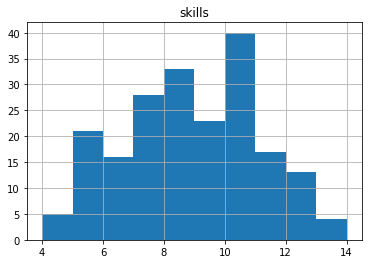

In [64]:
people.hist("skills", bins=10)

array([[<AxesSubplot:title={'center':'hobbies'}>]], dtype=object)

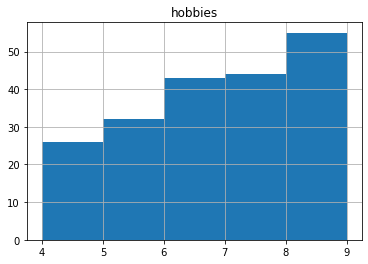

In [65]:
people.hist("hobbies", bins=5)

In [66]:
people = people.set_index('id')

In [67]:
people = people.merge(attendance, left_index=True, right_on='person_id')

In [68]:
people

,name,surname,skills,hobbies,person_id,grade
0,Giulia,Šelmić,7,9,75,2.86
1,Stephani,Kadijević,8,8,57,2.43
2,Maroje,Matković,7,8,32,2.11
3,Dejan,Krezić,11,4,189,3.18
4,Zvonimira,Krstić,8,7,154,2.33
...,...,...,...,...,...,...
195,Lidia,Gleđa,10,6,131,2.79
196,Vjekoslava,Šljokavica,12,7,98,3.04
197,Leona,Špica,11,5,25,2.14
198,Silvija,Bekovac,7,9,77,4.07


<AxesSubplot:xlabel='grade'>

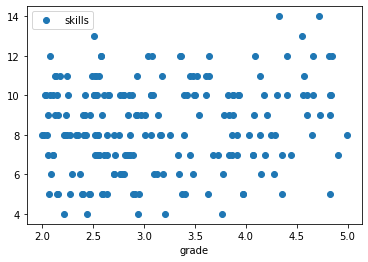

In [69]:
people.plot(x='grade', y='skills', style='o')